# Выпускная квалификационная работа по курсу «Data Science»

In [75]:
!pip3 install -U stemgraphic
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import stemgraphic
from scipy import stats
from sklearn import preprocessing
from scipy.stats import boxcox, shapiro
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import SplineTransformer
from sklearn.neural_network import MLPRegressor
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print(tf.__version__)

2.8.2


### Загружаем данные

In [77]:
xbp_dataFrame = pd.read_excel('sample_data/data/X_bp.xlsx', index_col=0)
xnup_dataFrame = pd.read_excel('sample_data/data/X_nup.xlsx', index_col=0)


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
pd.DataFrame(xnup_dataFrame.columns, columns=['характиристики нашивок'])

характиристики нашивок
0     Угол нашивки, град
1            Шаг нашивки
2      Плотность нашивки

In [80]:
pd.DataFrame(xbp_dataFrame.columns, columns=['характиристики базальтопластика'])

характиристики базальтопластика
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [81]:
xbp_dataFrame.shape

(1023, 10)

In [82]:
xnup_dataFrame.shape

(1040, 3)

In [83]:
xbp_dataFrame.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  
0.0                    220.0  
1.0                    220.0  
2.0                    220.0  
3.0                    220.0  
4.0                    220.0

In [84]:
xnup_dataFrame.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0

### Объединяем два файла X_bp.xlsx и X_nup.xslx по индексу, тип объединения INNER.

In [85]:
join_dataFrame = xbp_dataFrame.join(xnup_dataFrame, how='inner')


In [86]:
join_dataFrame.shape

(1023, 13)

In [87]:
join_dataFrame.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [88]:
pd.DataFrame(join_dataFrame.columns, columns=['характиристики композиционных материалов в join_dataFrame'])

характиристики композиционных материалов в join_dataFrame
0                     Соотношение матрица-наполнитель       
1                                    Плотность, кг/м3       
2                               модуль упругости, ГПа       
3                         Количество отвердителя, м.%       
4                     Содержание эпоксидных групп,%_2       
5                            Температура вспышки, С_2       
6                       Поверхностная плотность, г/м2       
7                Модуль упругости при растяжении, ГПа       
8                       Прочность при растяжении, МПа       
9                             Потребление смолы, г/м2       
10                                 Угол нашивки, град       
11                                        Шаг нашивки       
12                                  Плотность нашивки

## Анализ таблицы

In [89]:
join_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

## Описательная статистика характеристик композиционных материалов

In [90]:
join_dataFrame.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

## Количество уникальных значений

In [91]:
join_dataFrame.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [92]:
join_dataFrame.duplicated().sum()

0

In [93]:
join_dataFrame.isna()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                               False             False   
1.0                               False             False   
2.0                               False             False   
3.0                               False             False   
4.0                               False             False   
...                                 ...               ...   
1018.0                            False             False   
1019.0                            False             False   
1020.0                            False             False   
1021.0                            False             False   
1022.0                            False             False   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                     False                        False   
1.0                     False                        False   
2.0                     False                        False   
3.0                     False                        False   
4.0                     False                        False   
...                       ...                          ...   
1018.0                  False                        False   
1019.0                  False                        False   
1020.0                  False                        False   
1021.0                  False                        False   
1022.0                  False                        False   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                               False                     False   
1.0                               False                     False   
2.0                               False                     False   
3.0                               False                     False   
4.0                               False                     False   
...                                 ...                       ...   
1018.0                            False                     False   
1019.0                            False                     False   
1020.0                            False                     False   
1021.0                            False                     False   
1022.0                            False                     False   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                             False                                 False   
1.0                             False                                 False   
2.0                             False                                 False   
3.0                             False                                 False   
4.0                             False                                 False   
...                               ...                                   ...   
1018.0                          False                                 False   
1019.0                          False                                 False   
1020.0                          False                                 False   
1021.0                          False                                 False   
1022.0                          False                                 False   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                             False                    False   
1.0                             False                    False   
2.0                             False                    False   
3.0                             False                    False   
4.0                             False                    False   
...                               ...                      ...   
1018.0                          False                    False   
1019.0                          False                    False   
1020.0                          False                    False   
1021.0                          False                    False   
1022.0                    

In [94]:
join_dataFrame.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

## Гистограммы

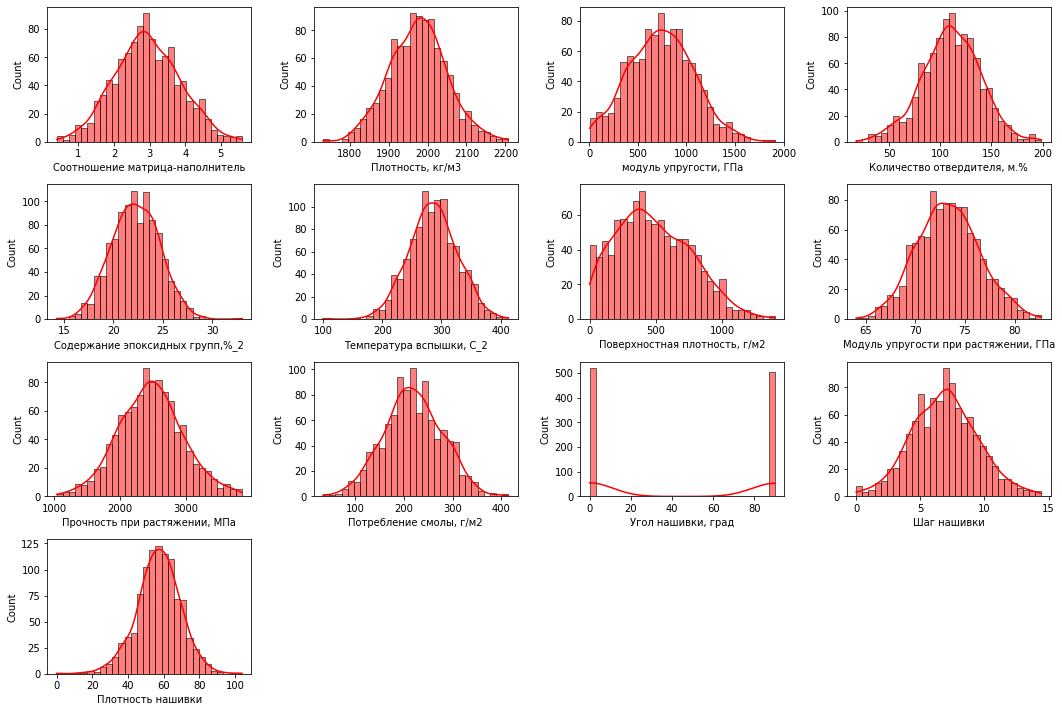

In [95]:
from matplotlib.colorbar import colorbar_factory
def histodraw(join_dataFrame, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=join_dataFrame, x=var_name, kde=True, bins=30, color = 'red')
    fig.tight_layout()
    plt.show()

histodraw(join_dataFrame, join_dataFrame.columns, 4, 4)

 ## Попарные графики рассеяния

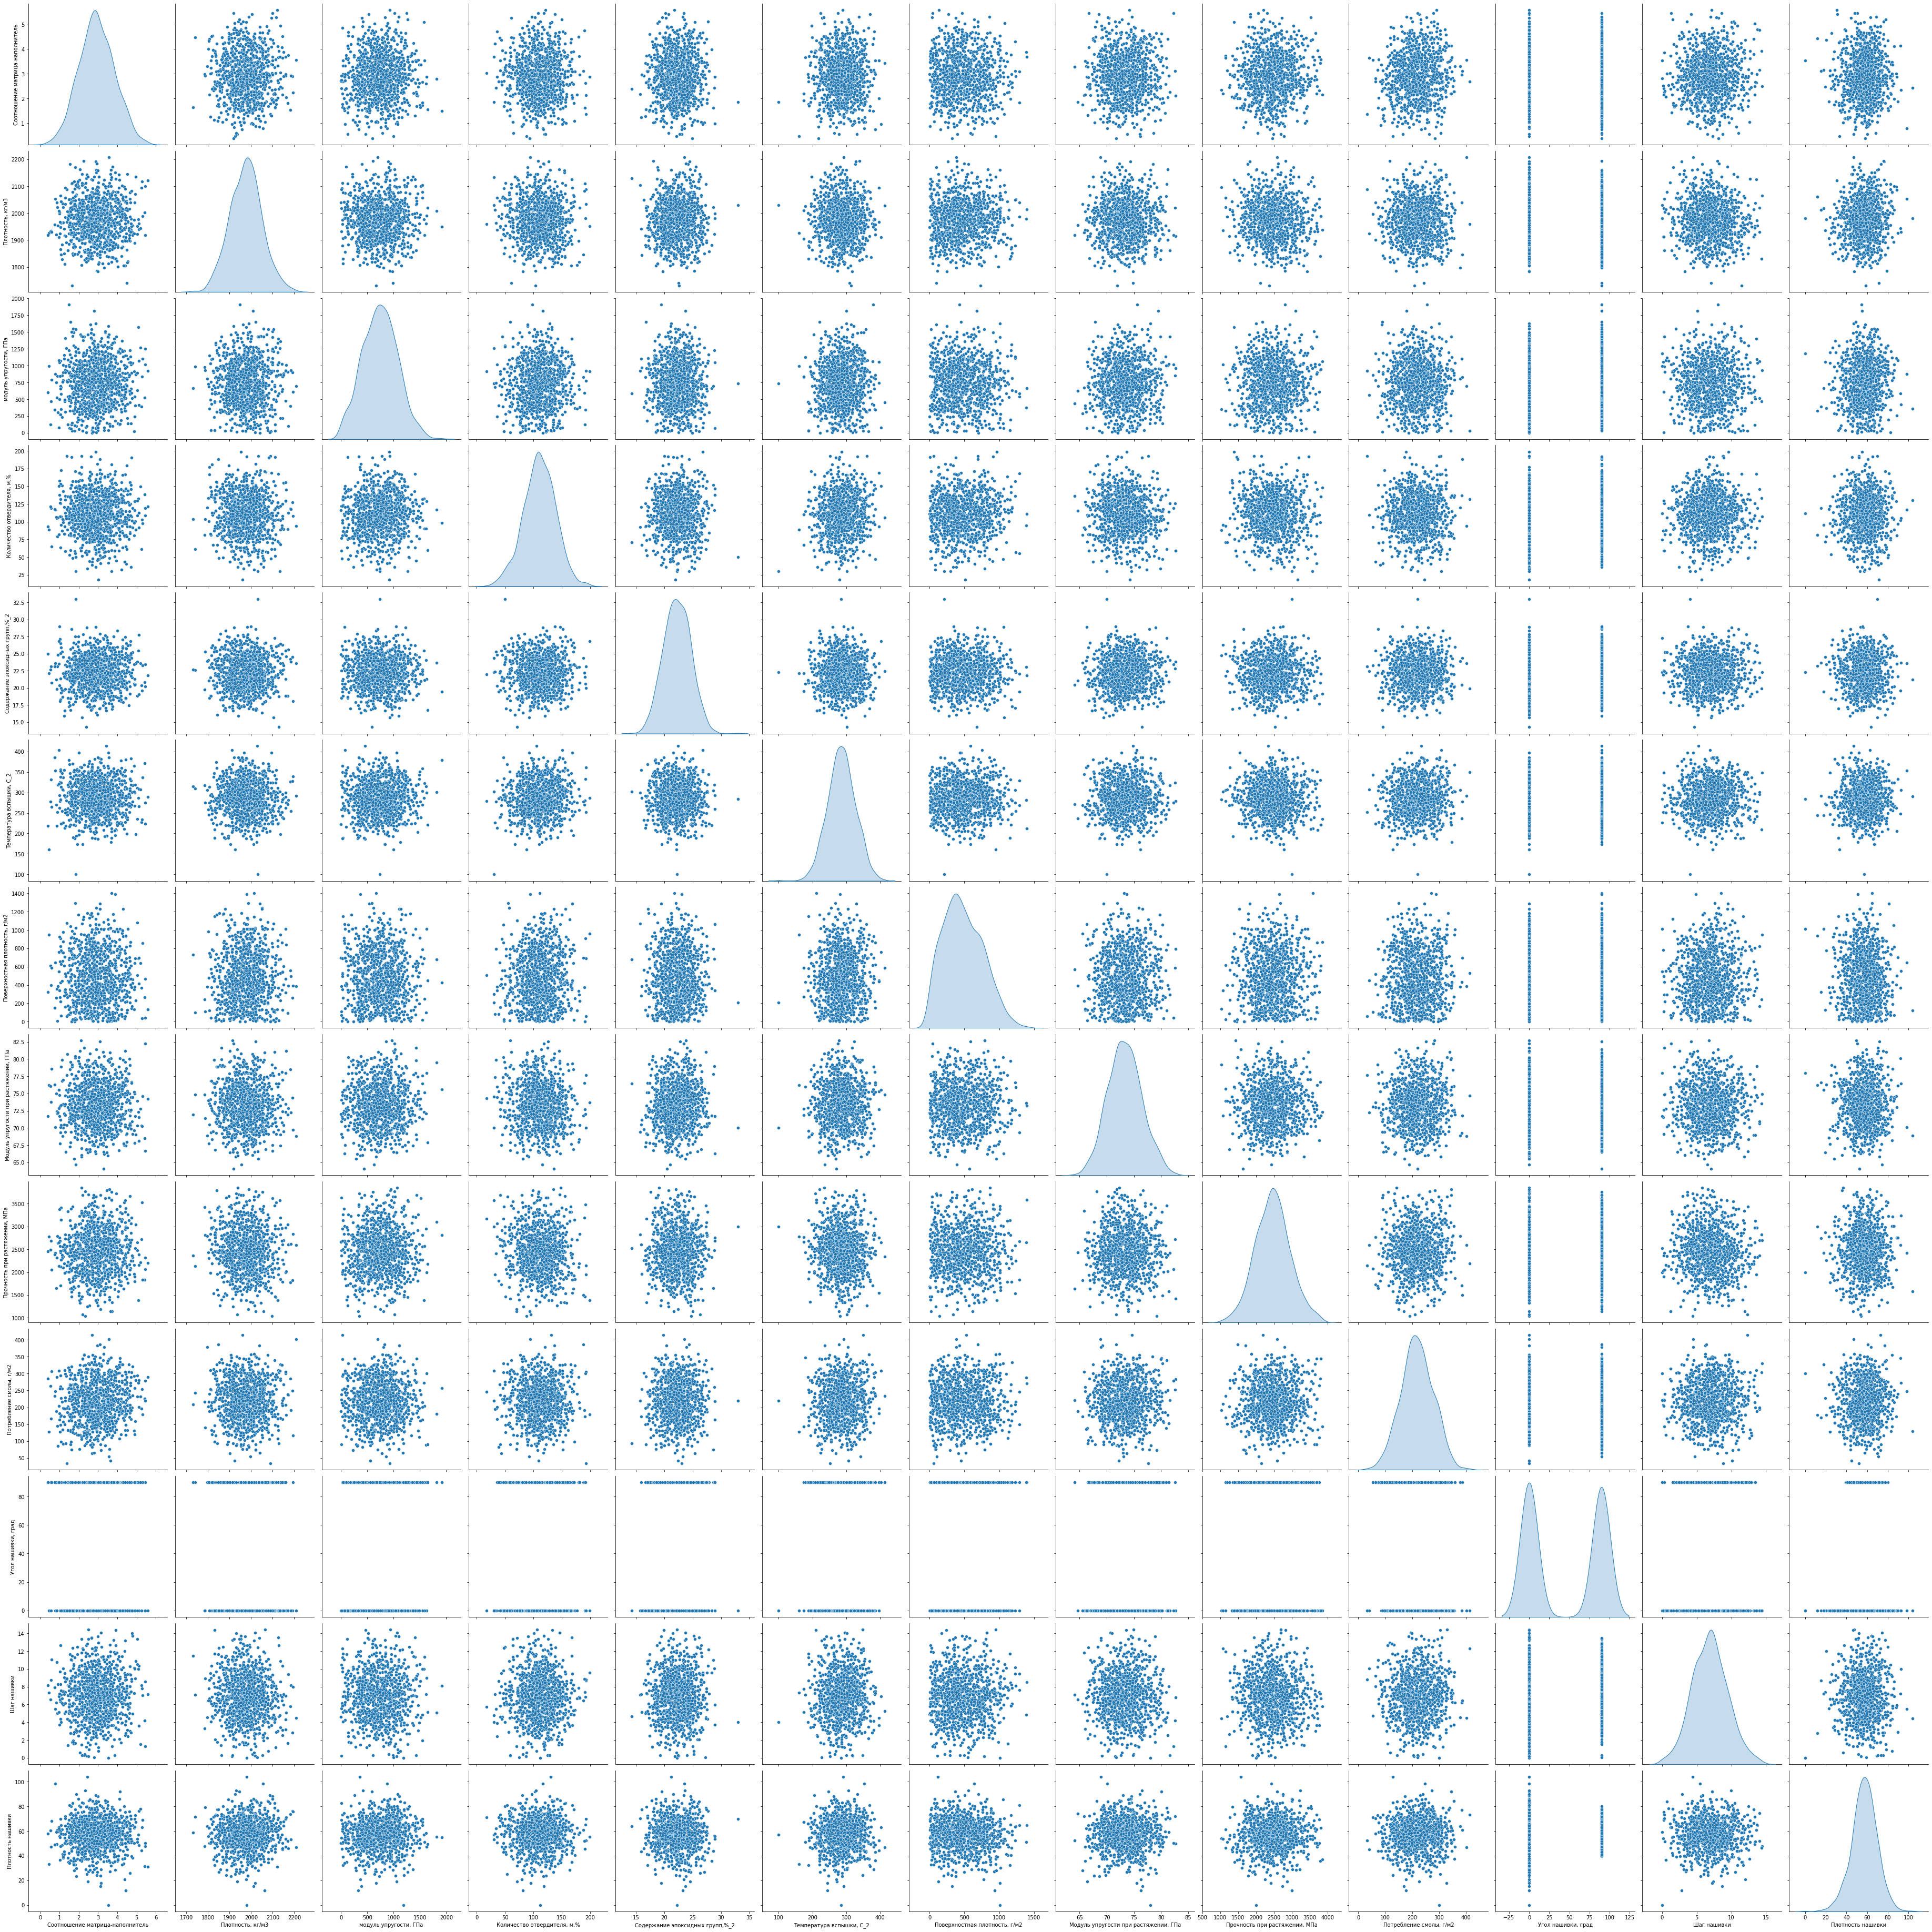

In [96]:
sns.pairplot(join_dataFrame, height=4, diag_kind='kde');

# Диаграмма "Ящик с усами" до удаления выбросов

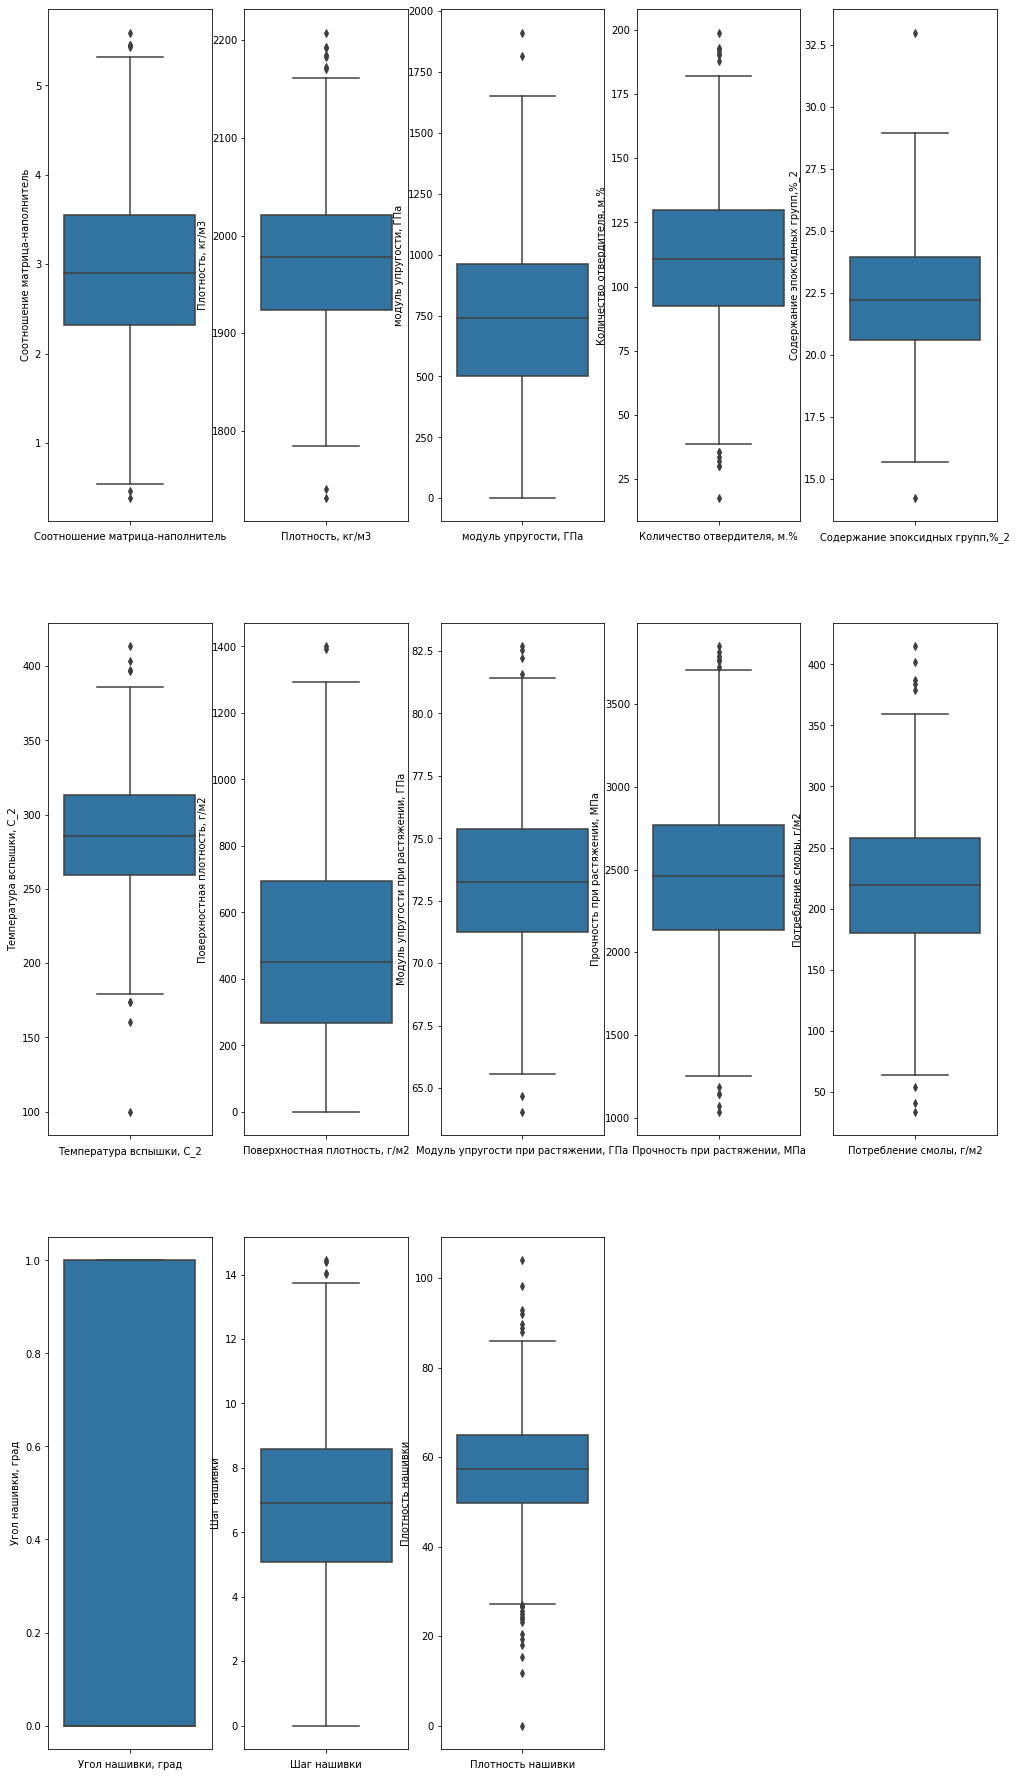

In [66]:
n = 1  # счетчик
s = 3  # строки
c = 5  # столбцы


fig = plt.figure(figsize=(17, 32))

for i in join_dataFrame.columns:
    plt.subplot(s, c, n)
    plt.xlabel(i)
    sns.boxplot(y = join_dataFrame[i])
    n = n + 1
   
plt.show()

# Визуализация данных с помощью корреляционной матрицы до удаления выбросов

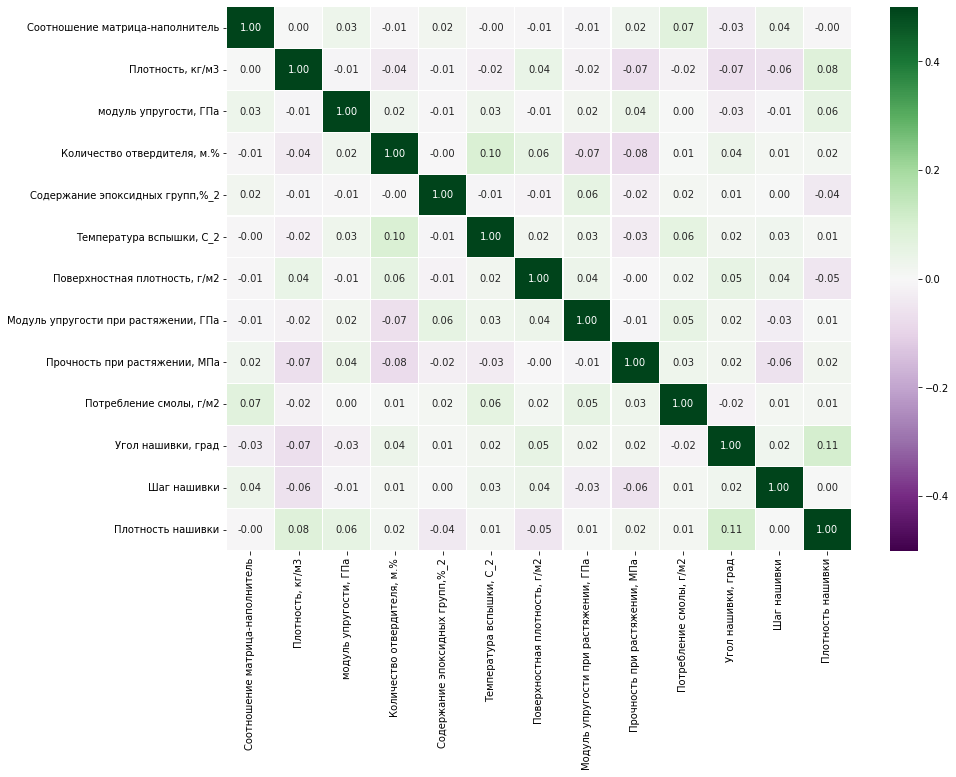

In [67]:
cor_map = join_dataFrame.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cor_map, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
plt.show()

# Корреляции между переменными на тепловой карте визуально не выявлено

# Сравнение двух методов удаления выбросов: 3-х сигм или межквартильных расстояний

In [71]:
sgm = 0
iqd= 0
for column in join_dataFrame:
    d = join_dataFrame.loc[:, [column]]
    # методом 3-х сигм
    zscore = (join_dataFrame[column] - join_dataFrame[column].mean()) / join_dataFrame[column].std()
    d['3s'] = zscore.abs() > 3
    sgm += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(join_dataFrame[column], 0.25)
    q3 = np.quantile(join_dataFrame[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (join_dataFrame[column] <= lower) | (join_dataFrame[column] >= upper)
    iqd+= d['iq'].sum()
print( sgm,'-- выброс методом 3-х сигм',)
print( iqd,'-- выброс методом межквартильных расстояний',)

24 -- выброс методом 3-х сигм
93 -- выброс методом межквартильных расстояний


# Распределение выбросов по характеристикам

In [74]:
temp_dataFrame = join_dataFrame.copy()
for i in join_dataFrame.columns:
    print(f"_______________________________________")
    temp_dataFrame[i] = abs((join_dataFrame[i] - join_dataFrame[i].mean()) / join_dataFrame[i].std())
    print(f"{sum(temp_dataFrame[i] > 3)} -> выбросов в признаке: '{i}'")
print(f' Всего - {sum(sum(temp_dataFrame.values > 3))} выброса')

_______________________________________
0 -> выбросов в признаке: 'Соотношение матрица-наполнитель'
_______________________________________
3 -> выбросов в признаке: 'Плотность, кг/м3'
_______________________________________
2 -> выбросов в признаке: 'модуль упругости, ГПа'
_______________________________________
2 -> выбросов в признаке: 'Количество отвердителя, м.%'
_______________________________________
2 -> выбросов в признаке: 'Содержание эпоксидных групп,%_2'
_______________________________________
3 -> выбросов в признаке: 'Температура вспышки, С_2'
_______________________________________
2 -> выбросов в признаке: 'Поверхностная плотность, г/м2'
_______________________________________
0 -> выбросов в признаке: 'Модуль упругости при растяжении, ГПа'
_______________________________________
0 -> выбросов в признаке: 'Прочность при растяжении, МПа'
_______________________________________
3 -> выбросов в признаке: 'Потребление смолы, г/м2'
_______________________________________
0 -

## "Угол нашивки" закодируем с помощью LabelEncoder

In [97]:
le = LabelEncoder()
join_dataFrame['Угол нашивки, град'] = le.fit_transform(join_dataFrame['Угол нашивки, град'])


# Удаление выбросов

In [98]:
join_dataFrame_drop = join_dataFrame[(np.abs(stats.zscore(join_dataFrame)) <= 3).all(axis=1)]

join_dataFrame_drop

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
5.0                            2.767918       2000.000000   
6.0                            2.569620       1910.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
1.0                738.736842                    50.000000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
5.0                748.000000                   111.860000   
6.0                807.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1.0                           23.750000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
5.0                           22.267857                284.615385   
6.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
5.0                        210.000000                             70.000000   
6.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
5.0                       3000.000000               220.000000   
6.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

# "Ящик с усами" после удаления выбросов

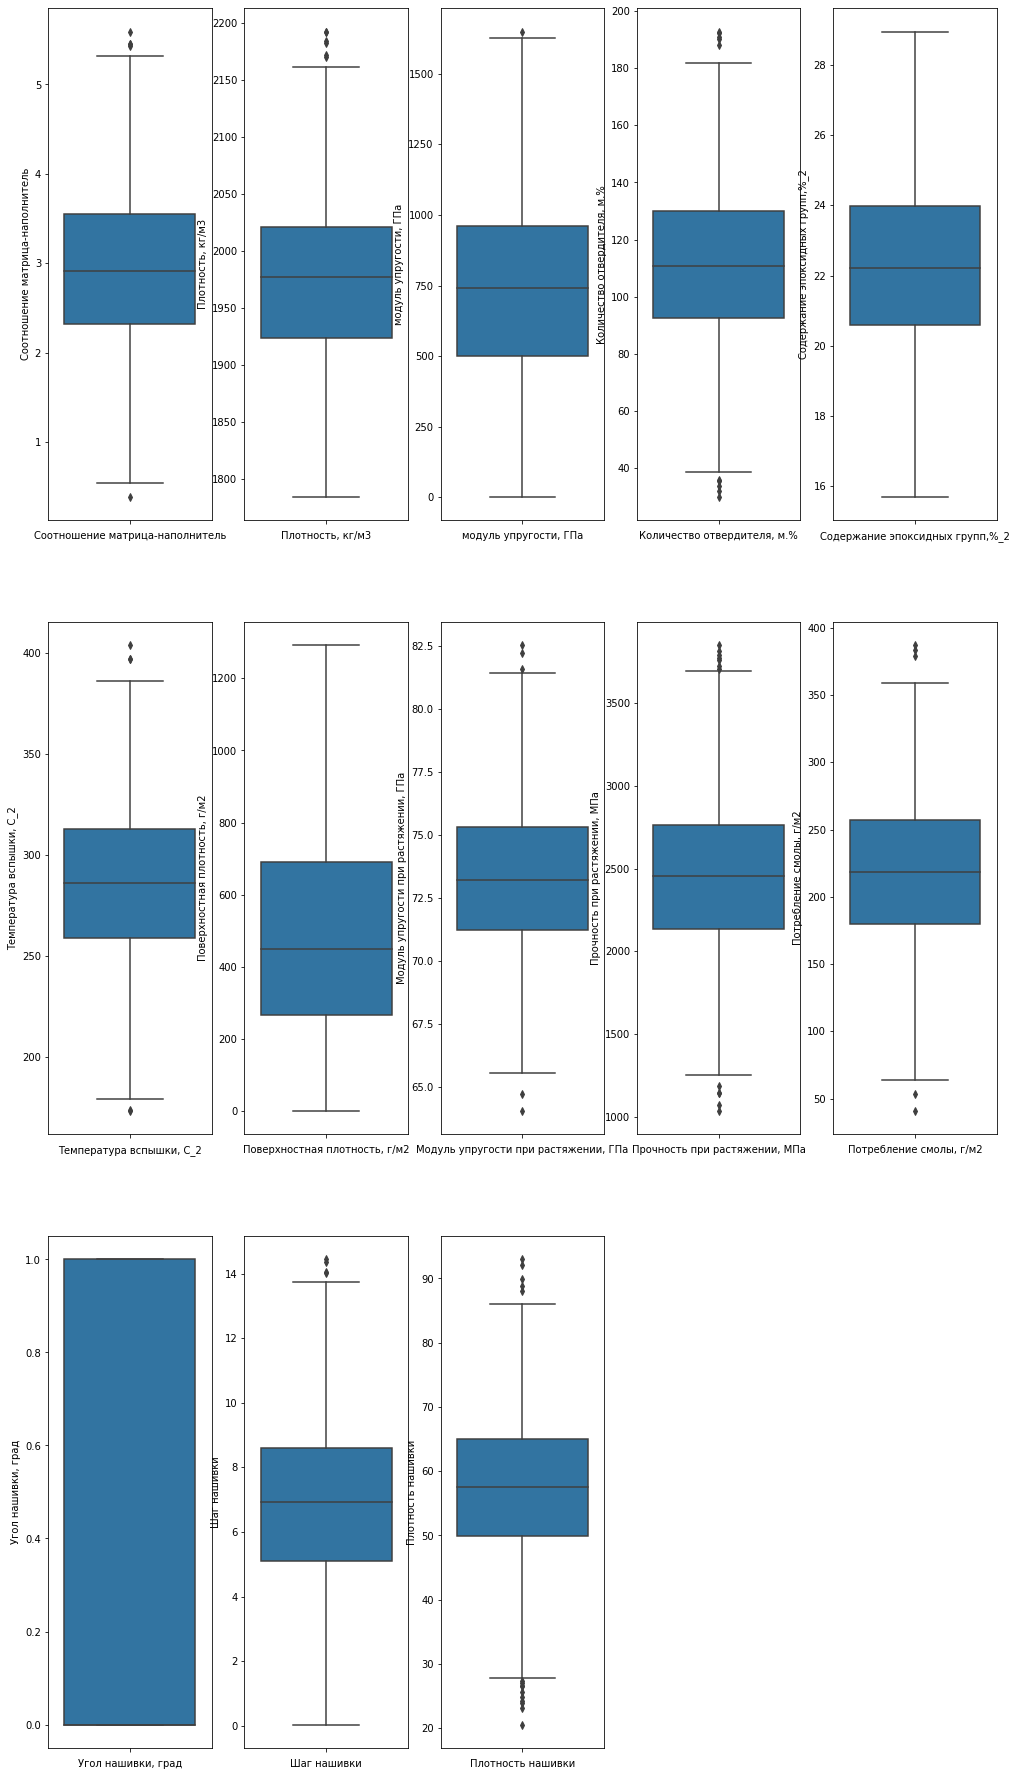

In [101]:
n = 1  # счетчик
s = 3  # строки
c = 5  # столбцы


fig = plt.figure(figsize=(17, 32))

for i in join_dataFrame_drop.columns:
    plt.subplot(s, c, n)
    plt.xlabel(i)
    sns.boxplot(y = join_dataFrame_drop[i])
    n = n + 1
   
plt.show()

# Корреляционная матрицы после удаления выбросов

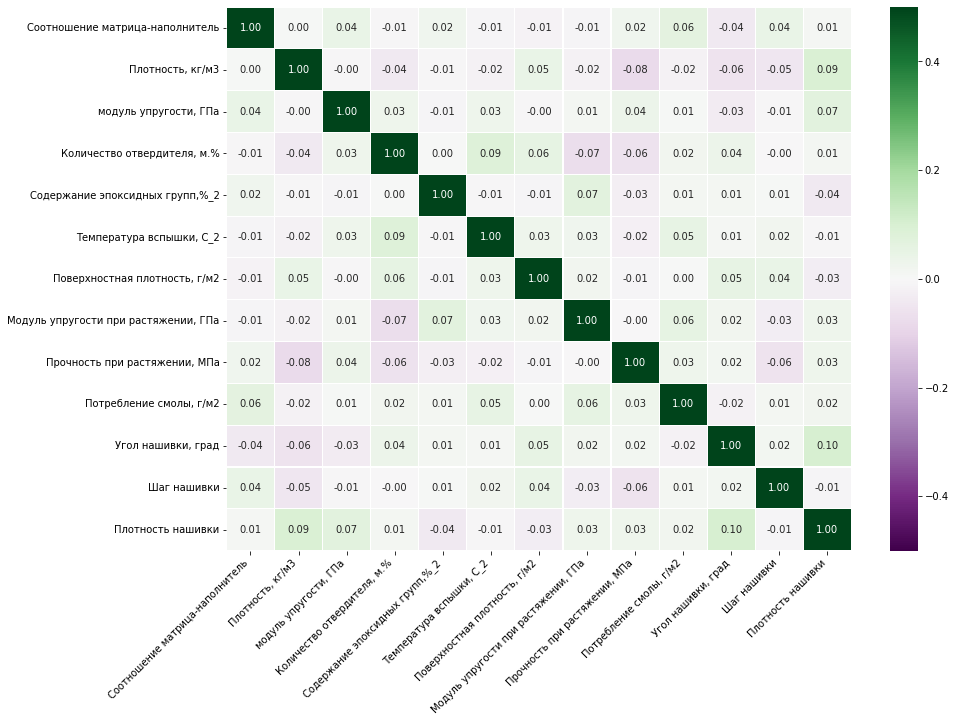

In [102]:
cor_map = join_dataFrame_drop.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cor_map, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Корреляции между переменными на тепловой карте визуально не выявлена

# Оценка плотности ядра

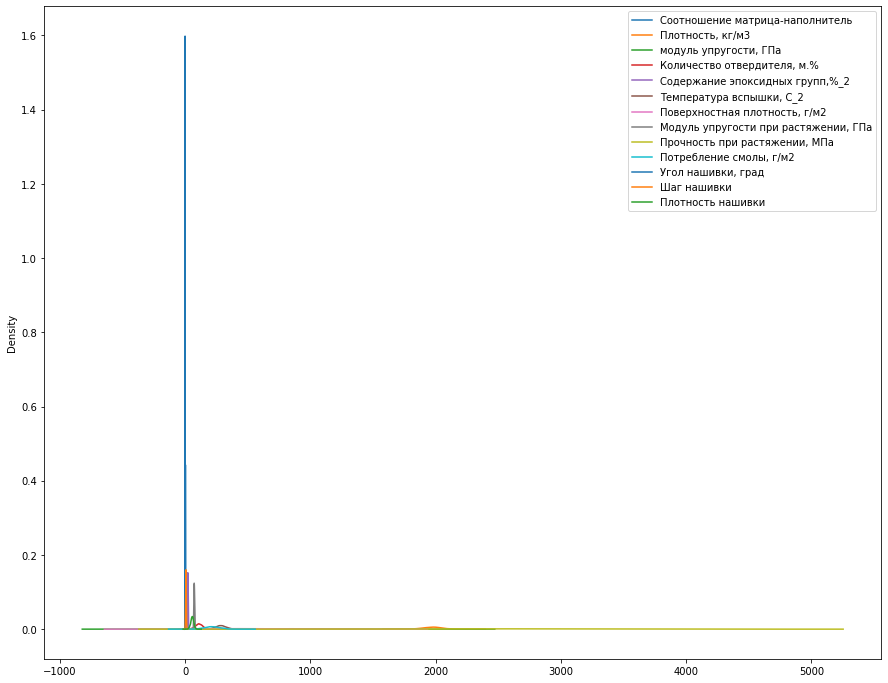

In [103]:
fig, ax = plt.subplots(figsize=(15, 12))
join_dataFrame_drop.plot(kind='kde', ax=ax)

## Видно, что данные находятся в разных диапазонах. Оценка плотности ядра показывает, что данные нужно нормализовать

In [104]:
scaler = preprocessing.MinMaxScaler()
names = join_dataFrame_drop.columns
d = scaler.fit_transform(join_dataFrame_drop)
join_dataFrame_drop_norm = pd.DataFrame(d, columns=names).round(2)
join_dataFrame_drop_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                             0.28              0.60                   0.45   
1                             0.28              0.60                   0.45   
2                             0.46              0.60                   0.46   
3                             0.46              0.53                   0.45   
4                             0.42              0.31                   0.49   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         0.12                             0.61   
1                         0.61                             0.42   
2                         0.50                             0.50   
3                         0.50                             0.50   
4                         0.50                             0.50   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                      0.48                           0.16   
1                      0.55                           0.16   
2                      0.48                           0.16   
3                      0.48                           0.16   
4                      0.48                           0.16   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  0.32                            0.7   
1                                  0.32                            0.7   
2                                  0.32                            0.7   
3                                  0.32                            0.7   
4                                  0.32                            0.7   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                     0.52                 0.0         0.28               0.54  
1                     0.52                 0.0         0.34               0.37  
2                     0.52                 0.0         0.34               0.50  
3                     0.52                 0.0         0.34               0.54  
4                     0.52                 0.0         0.34               0.68

## Описательная статистика характеристик после нормализации

In [105]:
join_dataFrame_drop_norm.describe().T.round(2)

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       999.0  0.49  0.17  0.0  0.37  0.48   
Плотность, кг/м3                      999.0  0.47  0.18  0.0  0.34  0.47   
модуль упругости, ГПа                 999.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           999.0  0.50  0.17  0.0  0.38  0.50   
Содержание эпоксидных групп,%_2       999.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              999.0  0.49  0.17  0.0  0.37  0.49   
Поверхностная плотность, г/м2         999.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  999.0  0.50  0.17  0.0  0.39  0.50   
Прочность при растяжении, МПа         999.0  0.51  0.17  0.0  0.39  0.50   
Потребление смолы, г/м2               999.0  0.51  0.17  0.0  0.40  0.51   
Угол нашивки, град                    999.0  0.50  0.50  0.0  0.00  0.00   
Шаг нашивки                           999.0  0.48  0.18  0.0  0.35  0.48   
Плотность нашивки                     999.0  0.51  0.16  0.0  0.41  0.51   

                                       75%  max  
Соотношение матрица-наполнитель       0.61  1.0  
Плотность, кг/м3                      0.58  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.61  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.61  1.0  
Поверхностная плотность, г/м2         0.54  1.0  
Модуль упругости при растяжении, ГПа  0.61  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.62  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.59  1.0  
Плотность нашивки                     0.61  1.0

In [107]:
join_dataFrame_drop_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    float64
 11  Шаг нашивки        

## Оценим ящик с усами после нормализации

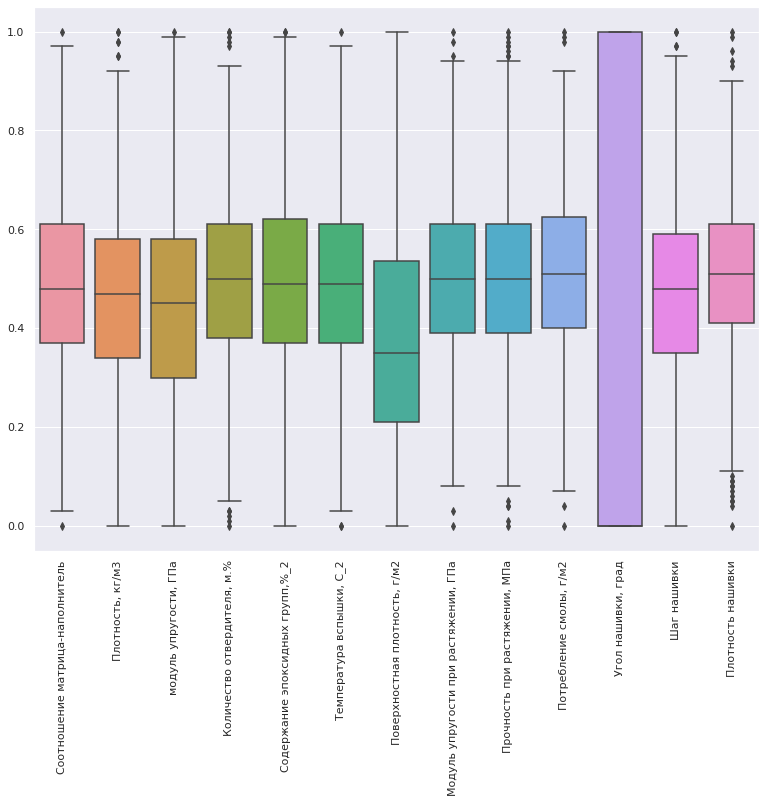

In [112]:
min_max_scaler = preprocessing.MinMaxScaler()
df_join_clean_norm = pd.DataFrame(min_max_scaler.fit_transform(join_dataFrame_drop),
    columns = join_dataFrame_drop.columns,
    index = join_dataFrame_drop.index)
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.boxplot(data=join_dataFrame_drop_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## Гистограмма после нормализации

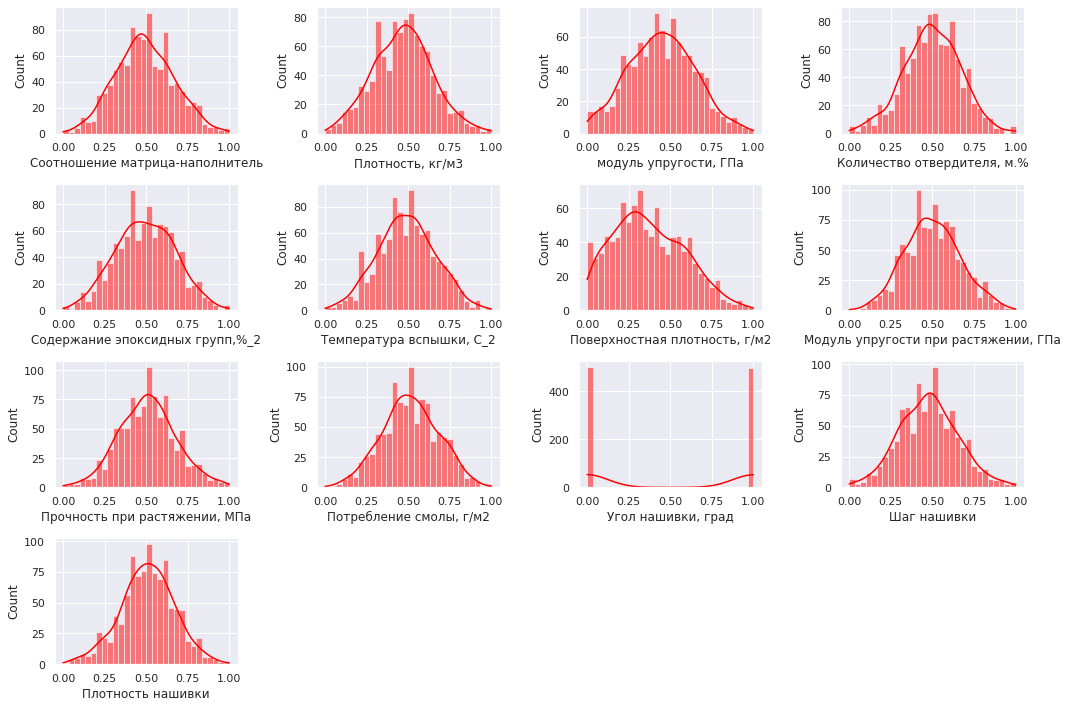

In [114]:
from matplotlib.colorbar import colorbar_factory
def histodraw(join_dataFrame_drop_norm, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=join_dataFrame_drop_norm, x=var_name, kde=True, bins=30, color = 'red')
    fig.tight_layout()
    plt.show()

histodraw(join_dataFrame_drop_norm, join_dataFrame_drop.columns, 4, 4)

# Корреляционная матрица после номализации данных

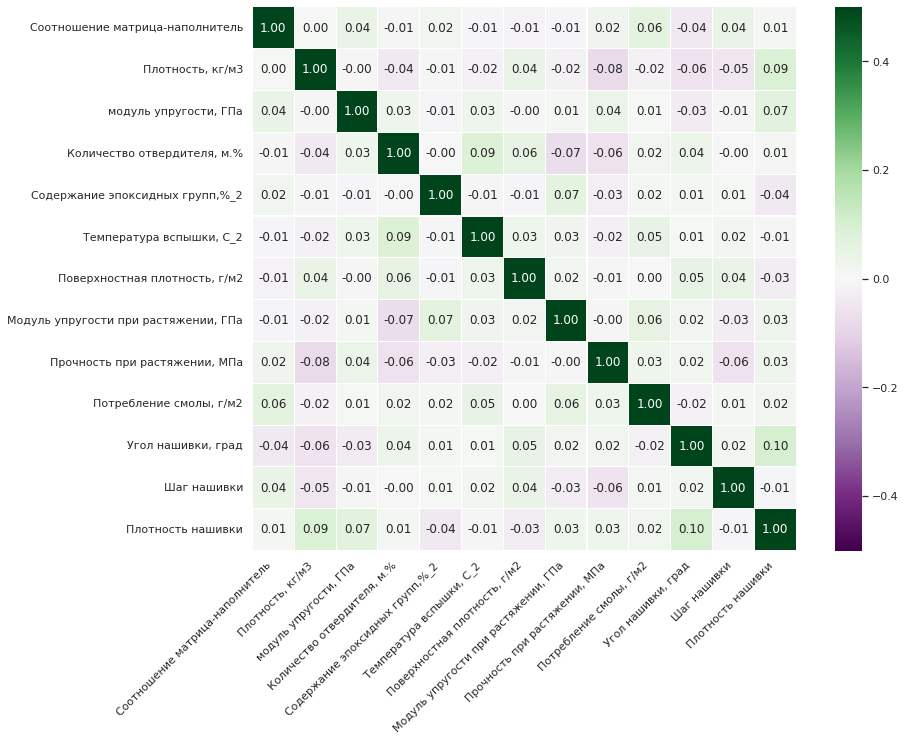

In [117]:
cor_map = join_dataFrame_drop_norm.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cor_map, vmin=-0.5, vmax=0.5,  annot=True, square=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
plt.xticks(rotation=45, ha='right')
plt.show()